We formulate a central bank problem in an linear quadratic dynamic programming approach and try to solve it.

A central bank faces the following objective function:

\begin{align*}
L_t = (\pi_{t} - \bar{\pi})^2 + (y_{t} - \bar{y})^2 + 0.1r_{t}^2 \\
\\
Subject \ to \ the \  laws \ of \ motion
\\
\\
\pi_{t+1} = \rho_{\pi}\pi_{t} - 0.5r_t + \epsilon_{t}^{\pi} \\
y_{t+1} = \rho_{y}y_{t} - 0.5r_t + \epsilon_{t}^{y}
\end{align*}


Therefore the minimization problem becomes:

$$
\underset{\{r_t\}}min \mathbb{E}\sum_{t=0}^{\infty} [(\pi_{t} - \bar{\pi})^2 + (y_{t} - \bar{y})^2 + 0.1r_{t}^2]
$$

$$
s.t.
$$

$$
\pi_{t+1} = \rho_{\pi}\pi_{t} - 0.5r_t + \epsilon_{t}^{\pi}
$$
$$
y_{t+1} = \rho_{y}y_{t} - 0.5r_t + \epsilon_{t}^{y}
$$

Setting it up in the LQDP formulation:

$$
\underset{\{u_t\}}min \mathbb{E}\sum_{t=0}^{\infty} [x_t'Rx_t + u_t'Qu_t]
$$

$$
s.t.
$$

\begin{align*}
x_{t+1} &= Ax_t + Bu_t + C\epsilon_t \\
\\
\\
&Where
\\
x_t &= \begin{bmatrix}
\pi_t - \bar{pi} \\
y_t - \bar{y} \\
1
\end{bmatrix} \\
u_t &= r_t
\\
R & = \begin{bmatrix}
1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 0 & 0
\end{bmatrix} \\
Q & = 0.1 \\
A & = \begin{bmatrix} 
\rho_{\pi} & 0 & (\rho_{\pi}\bar{\pi} - \bar{\pi}) \\ 
0 & \rho_{y} & (\rho_y\bar{y} - \bar{y}) \\
0 & 0 & 1
\end{bmatrix} \\
B &= \begin{bmatrix}
-0.5 \\
-0.5 \\
0
\end{bmatrix} \\
C &= \begin{bmatrix}
1 \\
1 \\
0
\end{bmatrix}
\end{align*}


In [5]:
import numpy as np
from quantecon import LQ
import matplotlib.pyplot as plt

In [6]:
pi_bar = 0.02 #target inflation rate
y_bar = 0.02 #target output rate

rho_pi = 0.75 #persistence coeff of pi
rho_y = 0.25 #persistence coeff of y


R = [[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]
Q = 0.1
A = [[rho_pi, 0, (rho_pi*pi_bar - pi_bar)],
    [0, rho_y, (rho_y*y_bar - y_bar)],
    [0, 0, 1]]
B = [[-0.5],
    [-0.5],
    [0]]
C = [[1],
    [1],
    [0]]
beta = 0.99

In [7]:
lq = LQ(Q, R, A, B, C, beta = beta)

In [8]:
P, F, d = lq.stationary_values()
print(F)

[[-0.74495417 -0.17590988  0.01227668]]


In [9]:
x0 = (1e-6, 1e-6, 1e-6) #initial states
xp, up, wp = lq.compute_sequence(x0)

In [10]:
pi_p = xp[0, :] #inflation process
y_p = xp[1, :] #output process
rp = up.flatten() #optimal interest rate policy
print(lq.P, lq.F)

[[ 1.43029304e+00 -1.06183304e-01  7.40805167e-03]
 [-1.06183304e-01  1.04418993e+00 -3.08318472e-03]
 [ 7.40805167e-03 -3.08318472e-03  1.00017100e+02]] [[-0.74495417 -0.17590988  0.01227668]]


Here's what the solution functions look like:

\begin{align*}
r_t &= 0.74495417\pi_t + 0.17590988y_t \\
V_t &= 1.43029304\pi_t^2 + 1.04418993y_t^2 -0.2123666\pi_ty_t
\end{align*}

Intuitive,ly, the central bank reacts strongly to inflation as compared to output because it knows inflation is more persistant and hence is likely to be a bigger problem if not controlled.

The value function tells us how much the bank "dislikes" inflation and output deviating from their targets. The interaction term in the value function is negative because it is easier to control the objective when inflation and output move in the same direction.

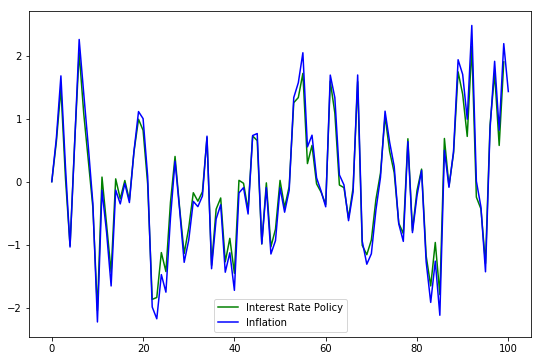

In [11]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(rp, 'g-', label="Interest Rate Policy")
ax.plot(pi_p, 'b-', label="Inflation")
#ax.plot(y_p, 'k-', label="Output")
ax.legend()
plt.show()

As we can see in the graphs, the interest rate goes hand in hand with inflation rate as we would expect.